# The linear–quadratic regulator: Appendix

For what follows, you will need the following packages:

In [38]:
import os
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
from control.matlab import *  # MATLAB-like functions 
#to solve ODE
from scipy import integrate
#show the version of Python I am using:
!python3 --version

Python 3.5.2


## Appendix

#### Finite approximation of the infinite Koopman operator

Let us consider the following differential equation:

$$ \frac{d}{dt}x = x^2 $$

Define $z_n$ as follows:

$$ z_n \equiv \begin{pmatrix} z_1 \\ z_2 \\ ... \\ z_n \end{pmatrix} = \begin{pmatrix} x \\ x^2 \\ ... \\ x^n \end{pmatrix} $$

The original dynamical system can be written an infinite Koopman expansion:
    
$$ \frac{d}{dt} \begin{pmatrix} z_1 \\ z_2 \\ z_3 \\ ... \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 & ... \\ 0 & 0 & 2 & ... \\ ... & ... & ... & ... \end{pmatrix}  \begin{pmatrix} z_1 \\ z_2 \\ z_3 \\ ... \end{pmatrix}  $$



What if we truncate the infinite expansion, using 3 terms for example?

$$ \frac{d}{dt} \begin{pmatrix} z_1 \\ z_2 \\ z_3 \end{pmatrix} = \begin{pmatrix} 0 & 1 & 0 \\ 0 & 0 & 2 \\ 0 & 0 & 0 \end{pmatrix}  \begin{pmatrix} z_1 \\ z_2 \\ z_3 \end{pmatrix}  $$

In [317]:
# Function that defines the dynamic system:
def vdp0_n(t, y):
    # linear part + nonlinear part:
    x = An.dot(y)
    return x

def vdp0_exact(t, y):
    x = y**2
    return x
    
# Set of starting values:
y0 = np.array([0.01])
list_y0_n = []
for n in range(1,10):
    list_y0_n.append(np.ones((n))*y0)

In [318]:
t0, t1 = 0, 10 # start and end
t = np.arange(t0, t1, 0.01)

In [319]:
## Exact solution

# Method for the ODE:
# This is an explicit runge-kutta method of order (4)5 due to Dormand & Prince
integrator = "dopri5"

# initialize an array to store the solution
c = np.zeros((len(t), len(y0)))   # array for solution
y_exact = np.zeros((len(t), len(y0)))   # array for solution
r0 = integrate.ode(vdp0_exact).set_integrator(integrator) 
r0.set_initial_value(y0, t0)   # initial values

for i in range(1, t.size):
   y_exact[i,:] = r0.integrate(t[i]) # get one more value, add it to the array
   if not r0.successful():
       raise RuntimeError("Could not integrate")
             

In [320]:
# To store the different trajectories
list_y_n = []


# Loop over the different starting values and calculate trajectories:
for y0 in list_y0_n:
    # generate the matrix An:
    An = np.zeros((len(y0), len(y0)))
    for i in range(1, len(y0)):
        An[i-1, i] = i
    #print(An)
    # initialize an array to store the solution
    y = np.zeros((len(t), len(y0)))   # array for solution
    r0 = integrate.ode(vdp0_n).set_integrator(integrator) 
    r0.set_initial_value(y0, t0)   # initial values
    for i in range(1, t.size):
       y[i, :] = r0.integrate(t[i]) # get one more value, add it to the array
       if not r0.successful():
           raise RuntimeError("Could not integrate")
    # append the list of solution
    list_y_n.append(y)


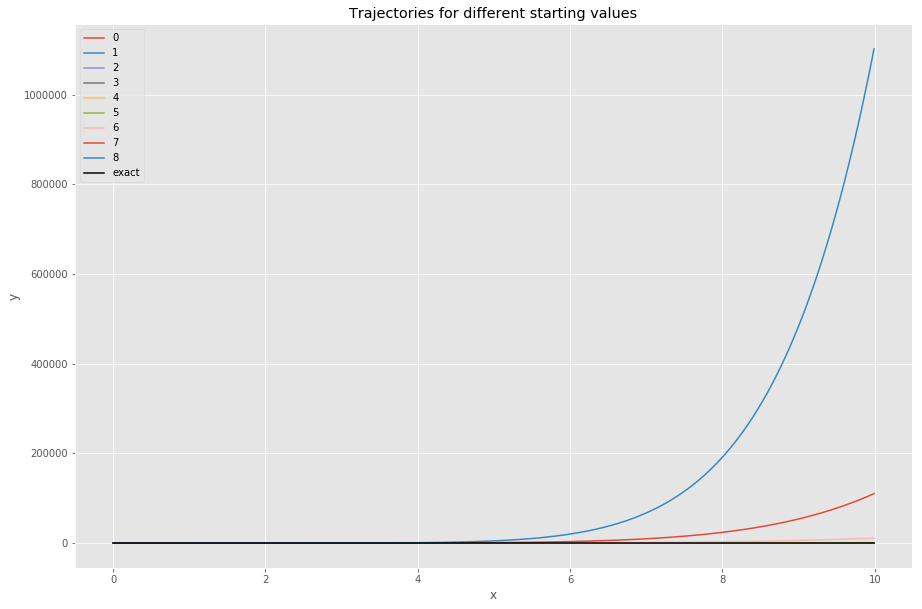

In [322]:
# Plot the different paths:
fig, ax = plt.subplots(figsize=(15, 10))

for k, y0 in enumerate(list_y0_n):
    if k!=0:
        #ax.plot(t, np.power(list_y_n[k][:,k], 1/k), label = k)
        ax.plot(t, list_y_n[k][:,0], label = k)
    else:
        ax.plot(t, list_y_n[k][:,0], label = k)
    plt.xlabel("x")
    plt.ylabel("y")
    
ax.plot(t, y_exact[:,0], label = "exact", color= "k")
plt.title("Trajectories for different starting values")
plt.legend()
plt.show()